# 🐔 Étude de marché - Partie 2

# Les clusterings effectués et les différentes visualisations associées

## Sommaire

    
  - <a href = "#C1" >  Import des librairies et données nécessaires à l'étude </a>
 
A.  <a href = "#C2" > Clustering </a>
 
  - a) <a href = "#C3" > K-means </a>   
 
   -   <a href = "#C4" > Méthode du coude </a>  
   -   <a href = "#C5" > Coefficient de silhouette </a>
 
 
-  b)<a href = "#C6" > Classification Ascendente Hiérarchique (CAH) - Dendrogramme  </a>
 
     -    <a href = "#C8" >  Coefficient de silhouette </a> 
   
 
 
B. <a href = "#C10" > Analyse en Composantes Principales (ACP) </a> 

   - <a href = "#C11" >  Eboulis des valeures propres  </a> 
   
   - <a href = "#C13" >  Cercle de corrélation  </a> 
 

### <a name="C1" > Import des librairies et données nécessaires à l'étude </a>


In [172]:
# Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Données
Complet_df = pd.read_pickle('Complet_df.pkl')
Complet_df.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Population,PIB,% Sous-alimenté,ISO3
0,Afghanistan,1.53,0.0,29.0,28.0,36296113.0,530.149831,22.32,AFG
1,Afrique du Sud,35.69,63.0,514.0,1667.0,57009756.0,6723.928582,5.61,ZAF
2,Albanie,16.36,0.0,38.0,13.0,2884169.0,4521.752219,3.47,ALB
3,Algérie,6.38,0.0,2.0,275.0,41389189.0,4134.936054,2.66,DZA
4,Allemagne,19.47,646.0,842.0,1514.0,82658409.0,44670.222288,0.00,DEU


In [173]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

## <a name="C2" > Clustering </a>

In [174]:
# DataClustering
DataClustering = Complet_df[[ 'Disponibilité alimentaire en quantité (kg/personne/an)','Exportations - Quantité','Importations - Quantité','Production','Population','PIB','% Sous-alimenté']]

scaler = StandardScaler()

# DataClustering scaled
DataClusteringScaled = scaler.fit_transform(DataClustering)  
DataClusteringScaled

array([[-1.14480592, -0.23977117, -0.34771334, ..., -0.06893147,
        -0.7004789 ,  1.16126339],
       [ 1.14526438, -0.10846247,  2.16206586, ...,  0.06042904,
        -0.37885317, -0.27575179],
       [-0.15060971, -0.23977117, -0.30114012, ..., -0.27759521,
        -0.49320607, -0.45978604],
       ...,
       [ 2.48538457,  7.45533573,  0.13871809, ...,  1.73460671,
         2.33879275, -0.75819674],
       [-1.23866126, -0.23977117, -0.49260781, ...,  0.36887972,
        -0.69115219,  0.59970091],
       [-0.9490505 , -0.23977117, -0.4667338 , ..., -0.29163519,
        -0.60942808,  0.59368109]])

### Transformer à DataFrame

In [175]:
DataClusteringScaled = pd.DataFrame(DataClusteringScaled, columns= DataClustering.columns)
DataClusteringScaled.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Population,PIB,% Sous-alimenté
0,-1.144806,-0.239771,-0.347713,-0.290844,-0.068931,-0.700479,1.161263
1,1.145264,-0.108462,2.162066,0.342389,0.060429,-0.378853,-0.275752
2,-0.150610,-0.239771,-0.301140,-0.296640,-0.277595,-0.493206,-0.459786
3,-0.819664,-0.239771,-0.487433,-0.195415,-0.037124,-0.513292,-0.529444
4,0.057883,1.106664,3.859401,0.283277,0.220610,1.591593,-0.758197


### <a name="C3" > K-means </a>

### Construire le modèle de clustering et calculer les valeurs de l'Inertie :

In [176]:
inertias = []

K = range(2, 10)

for k in K:
	
	kmeanModel = KMeans(n_clusters = k, n_init = 'auto', random_state = 42).fit(DataClusteringScaled)
	inertias.append(kmeanModel.inertia_)
    

C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [177]:
inertias

[797.0254343917607,
 646.7007918650502,
 475.8999744006001,
 397.7264057706549,
 273.7719553278449,
 219.39637894188445,
 197.16504036838927,
 174.37745264631263]

### <a name="C4" > Méthode du coude </a> 

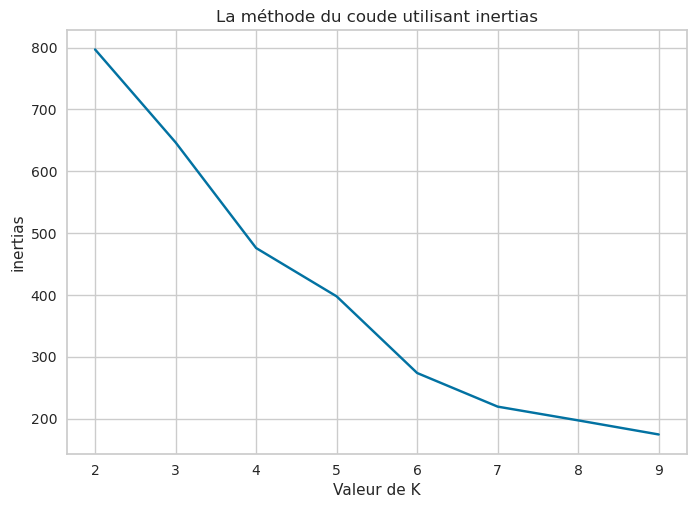

In [178]:
# Afficher la méthode du coude
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valeur de K')
plt.ylabel('inertias')
plt.title('La méthode du coude utilisant inertias')
plt.show()

In [249]:
# Calculer le nombre de cluster
kl = KneeLocator(
    K, inertias, curve = "convex", direction = "decreasing")

kl.elbow

6

C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


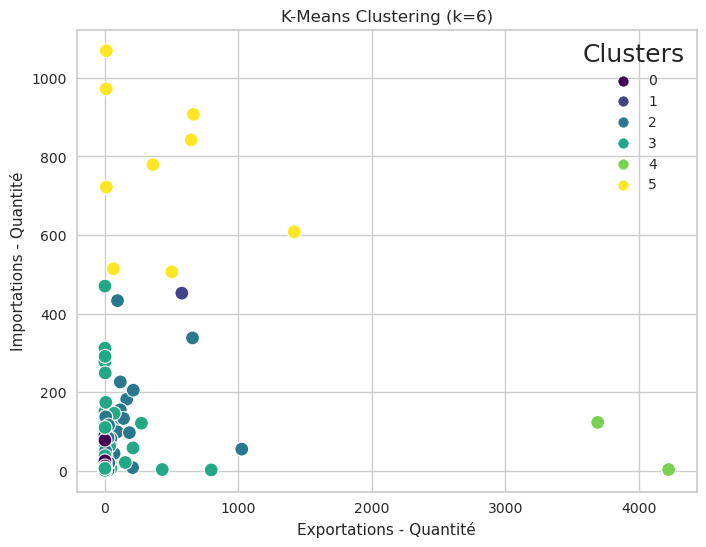

In [180]:
kmeans = KMeans(n_clusters = 6 , random_state = 42)
Complet_df['Cluster'] = kmeans.fit_predict(DataClusteringScaled)

plt.figure(figsize = (8, 6))
sns.scatterplot(x ='Exportations - Quantité', y = 'Importations - Quantité', data = Complet_df, hue = 'Cluster', palette = 'viridis', s = 100)

plt.title('K-Means Clustering (k=6)')
plt.xlabel('Exportations - Quantité')
plt.ylabel('Importations - Quantité')

plt.legend(title = 'Clusters', loc ='upper right')
plt.show()

### Le nombre optimal de cluster
Il faut choisir la valeur de k au coude, c'est à dire le point à partir duquel l'inertie commence à diminuer de façon linéaire. Ainsi, pour les données données, le nombre optimal de clusters est de 6.

### <a name="C5" > Coefficient de silhouette </a>

Le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique.

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation).

Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin.

In [181]:
km = KMeans(n_clusters = 6)

labels = km.fit_predict(DataClusteringScaled)

score = silhouette_score(DataClusteringScaled, labels, metric = 'euclidean')

print('Score Silhouette avec 6 clusters: %.3f' % score)

C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Score Silhouette avec 6 clusters: 0.333


C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

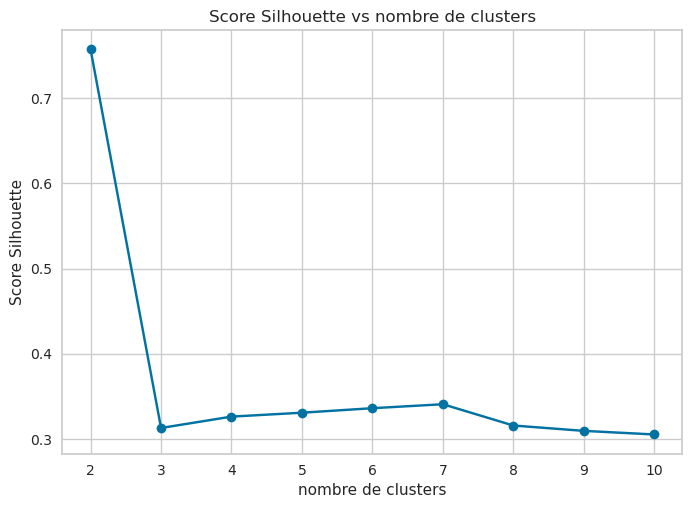

Le nombre optimal de clusters: 2


In [250]:
# Créer une liste vide pour stocker les scores de silhouette
silhouette_scores = []

# Définir une plage de numéros de cluster à prendre en compte
cluster_range = range(2, 11)  # Ajustez la plage selon vos besoins

for n_clusters in cluster_range:
    # Créer un modèle K-Means avec n_clusters
    km = KMeans(n_clusters=n_clusters, random_state=42)
    
# Ajuster le modèle à ensemble de données DataClusteringScaled
    km.fit(DataClusteringScaled)
    
    # Obtener des étiquettes de cluster pour chaque point de données
    labels = km.predict(DataClusteringScaled)
    
    # Calculer le score de silhouette
    score = silhouette_score(DataClusteringScaled, labels)
    
    # Ajouter le score de silhouette à la liste
    silhouette_scores.append(score)

# Tracer les scores de silhouette pour différents numéros de cluster
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('nombre de clusters')
plt.ylabel('Score Silhouette')
plt.title('Score Silhouette vs nombre de clusters')
plt.grid(True)
plt.show()

# Trouver le nombre de clusters avec le score silhouette le plus élevé
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Le nombre optimal de clusters: {optimal_num_clusters}')

 On met à coté "k = 2", nombre optimal de clustering est 6

C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


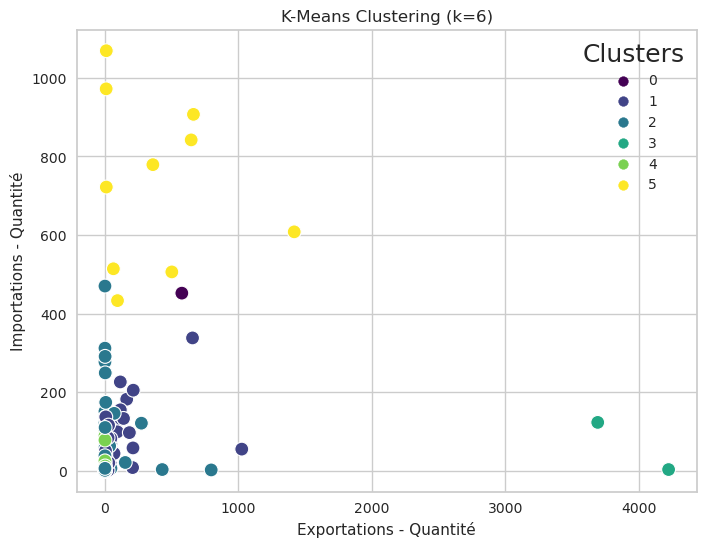

In [242]:
# Déterminer nombre de cluster à 6 afficher les corrélation de pays par rapport deux variables d'importation et exportation
kmeans = KMeans(n_clusters = 6)
Complet_df['Cluster'] = kmeans.fit_predict(DataClusteringScaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Exportations - Quantité', y='Importations - Quantité', data=Complet_df, hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (k=6)')
plt.xlabel('Exportations - Quantité')
plt.ylabel('Importations - Quantité')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [243]:
# Afficher le nombre de pays par cluster
Complet_df['Cluster'].value_counts()

2    76
1    40
4    25
5    10
3     2
0     2
Name: Cluster, dtype: int64

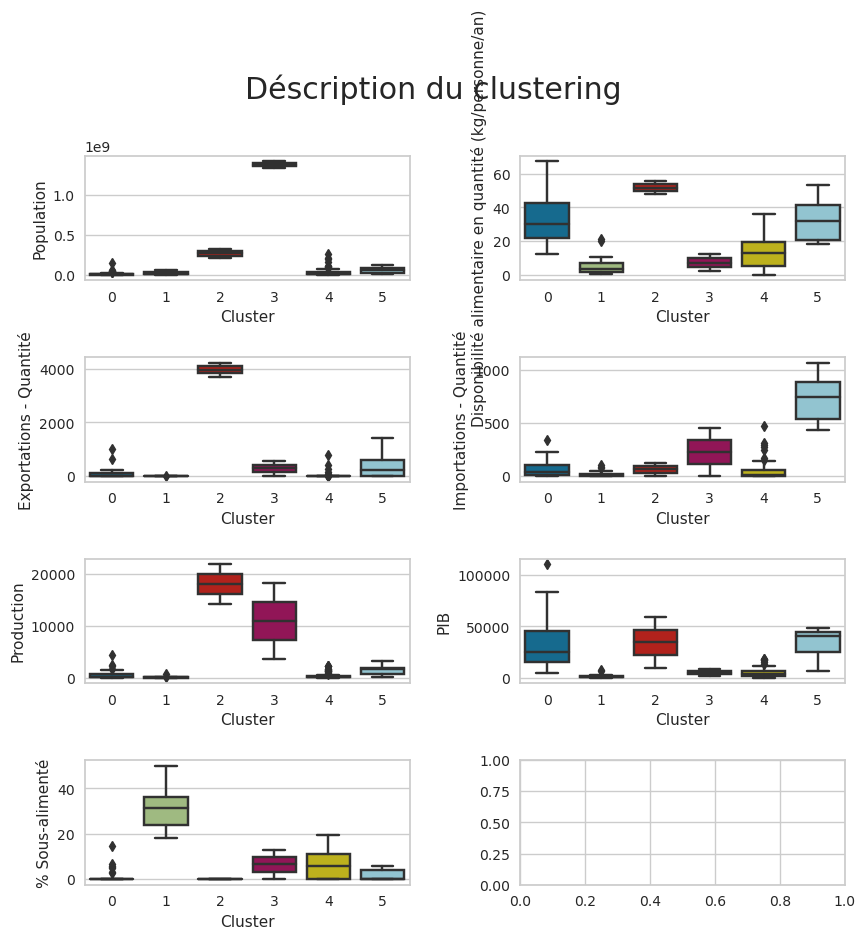

In [185]:
# Afficher déscription du clustering par différents variables
fig, axes = plt.subplots(4, 2, figsize=(9, 9), tight_layout=True)

fig.suptitle('Déscription du clustering')

ax = sns.boxplot(ax=axes[0, 0], x="Cluster", y="Population", data= Complet_df)
ax = sns.boxplot(ax=axes[0, 1], x="Cluster", y="Disponibilité alimentaire en quantité (kg/personne/an)", data=Complet_df)
ax = sns.boxplot(ax=axes[1, 0], x="Cluster", y="Exportations - Quantité", data=Complet_df)
ax = sns.boxplot(ax=axes[1, 1], x="Cluster", y="Importations - Quantité", data=Complet_df)
ax = sns.boxplot(ax=axes[2, 0], x="Cluster", y="Production", data= Complet_df)
ax = sns.boxplot(ax=axes[2, 1], x="Cluster", y="PIB", data= Complet_df)
ax = sns.boxplot(ax=axes[3, 0], x="Cluster", y="% Sous-alimenté", data= Complet_df)

## <a name="C6" > b) Classification Hiérarchique Ascendente (CHA)</a>

La classification ascendante hiérarchique (CAH) est une méthode de classification qui présente les avantages suivants : On travaille à partir des dissimilarités entre les objets que l'on veut regrouper. On peut donc choisir un type de dissimilarité adapté au sujet étudié et à la nature des données.

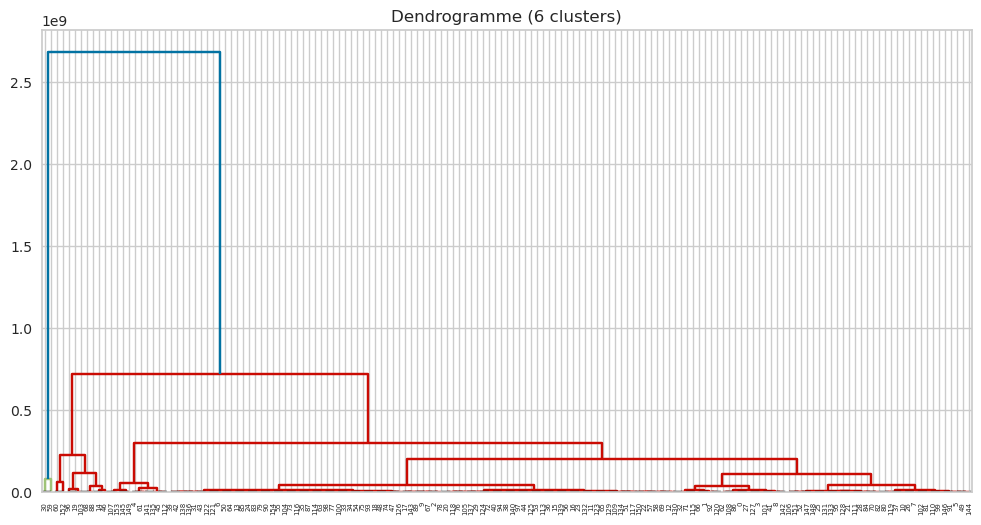

In [263]:
# Dendrogramme sur les 2 composantes de l'ACP
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 6))  
shc.dendrogram(shc.linkage(results['PC'], method='ward'))

plt.axhline(y=1.2, color='black', linestyle='dashed') # Threshold
plt.title('Dendrogramme (6 clusters)')  
plt.savefig('dendrogramme.png', dpi=300, bbox_inches='tight')
plt.show()

### <a name="C8" >  Coefficient de Silhouette</a>

Le meilleur nombre de clusters selon Silhouette Score: 2


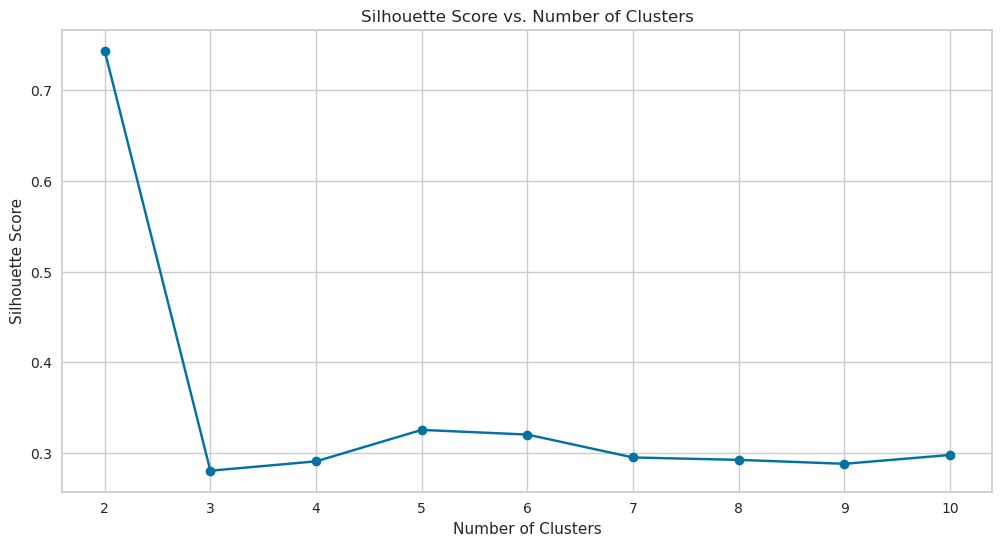

In [187]:
# Initialiser les variables pour stocker les scores de silhouette

silhouette_scores = []

for num_clusters in cluster_range:
    # Couper le dendrogramme pour obtenir les clusters 'num_clusters'
    labels = fcluster(Z, t=num_clusters, criterion='maxclust')
    
    # Calculer le score de silhouette pour le clustering actuel
    silhouette_avg = silhouette_score(DataClusteringScaled, labels)
    silhouette_scores.append(silhouette_avg)

# Trouver le nombre de clusters avec le score silhouette le plus élevé
best_num_clusters = cluster_range[np.argmax(silhouette_scores)]

# Tracer les scores de la silhouette
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Print le meilleur nombre de clusters
print(f"Le meilleur nombre de clusters selon Silhouette Score: {best_num_clusters}")

## <a name="C10" > ACP</a>

In [231]:
# Créer un objet PCA avec le nombre de composants souhaité
pca = PCA(n_components=3) 

# Ajuster le modèle PCA aux données
pca.fit(DataClusteringScaled)

# Transformer les données dans le nouvel espace de fonctionnalités
transformed_data = pca.transform(DataClusteringScaled)

# Accéder aux composantes principales (vecteurs propres) et au rapport de variance expliqué
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

print("Shape de données originales:", DataClusteringScaled.shape)
print("Shape de données transformée:", transformed_data.shape)
print("Composantes principales (vecteurs propres):\n", components)
print("Ratio de variance expliqué:", explained_variance_ratio)

Shape de données originales: (155, 7)
Shape de données transformée: (155, 3)
Composantes principales (vecteurs propres):
 [[ 0.3950095   0.45420283  0.29404332  0.48277218  0.25437393  0.35010067
  -0.36174612]
 [-0.36457076  0.26381697 -0.13734782  0.44524222  0.51552801 -0.42018206
   0.37156643]
 [ 0.21933275  0.41603087 -0.7781924   0.12711054 -0.39454797 -0.03526485
  -0.01261908]]
Ratio de variance expliqué: [0.36980164 0.2361743  0.12842827]


C:\Users\morta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


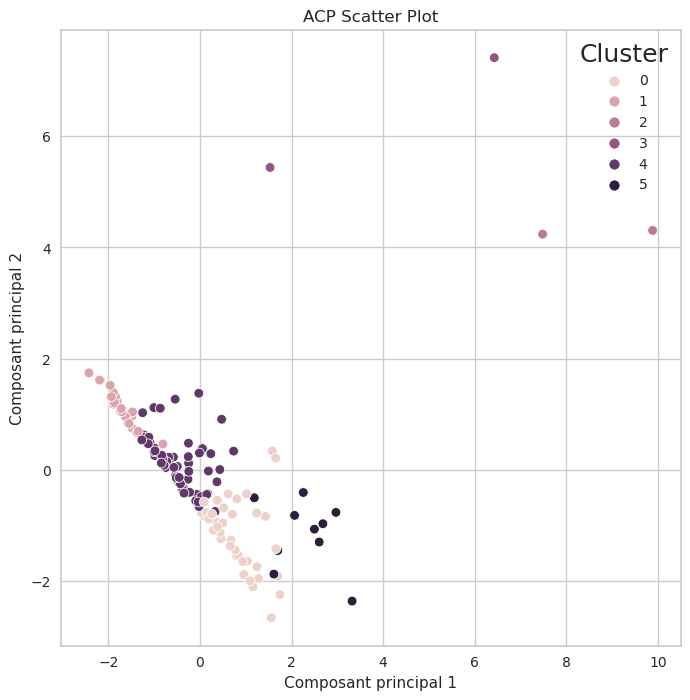

In [232]:
plt.figure(figsize=(8, 8))
sns.scatterplot(transformed_data[:, 0], transformed_data[:, 1], hue = Complet_df['Cluster'])

plt.title("ACP Scatter Plot")
plt.xlabel("Composant principal 1")
plt.ylabel("Composant principal 2")
plt.grid(True)

plt.show()

### <a name="C11" > Eboulis des valeures propres </a>

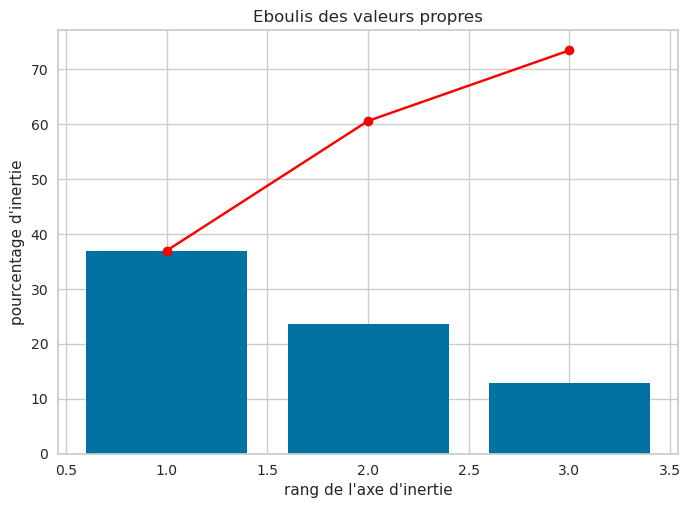

In [233]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)

In [229]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


C:\Users\morta\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,cluster,PC1,PC2,PC3
0,centroïde,1.189676e+08,-2655.944258,1837.880888
1,centroïde,1.332516e+09,-925.760615,-3201.804006
2,centroïde,-1.619622e+07,-5417.642465,49.142317
3,centroïde,3.745081e+07,1876.511187,271.851546
4,centroïde,2.475342e+08,19077.803324,8581.813030
5,centroïde,-4.204431e+07,2693.963450,-338.254980


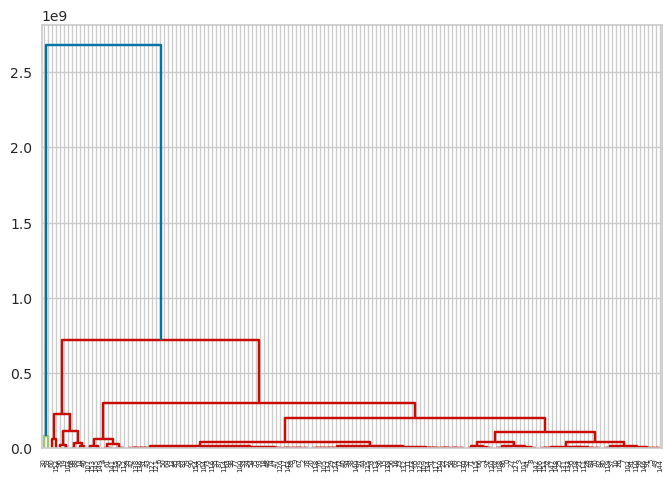

In [194]:
from pca import pca
categorial = ['Zone','ISO3']
model = pca(n_components=3)
results = model.fit_transform(Complet_df.drop(categorial,axis=1))

# Dendrogramme sur les 3 composantes de l'ACP
shc.dendrogram(shc.linkage(results['PC'], method='ward'))

# Cluster pour chaque individu
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
clusters = pd.DataFrame(cluster.fit_predict(results['PC']), columns=['cluster'])
trois_composantes = pd.merge(results['PC'], clusters, left_index=True, right_index=True)

# Moyenne par cluster de chaque composante issue de l'ACP
centroides = trois_composantes.groupby(['cluster']).mean().reset_index()
centroides['cluster'] = 'centroïde'
centroides

### <a name="C13" > Cercle de Corrélation </a>

In [195]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

### F1 & F2

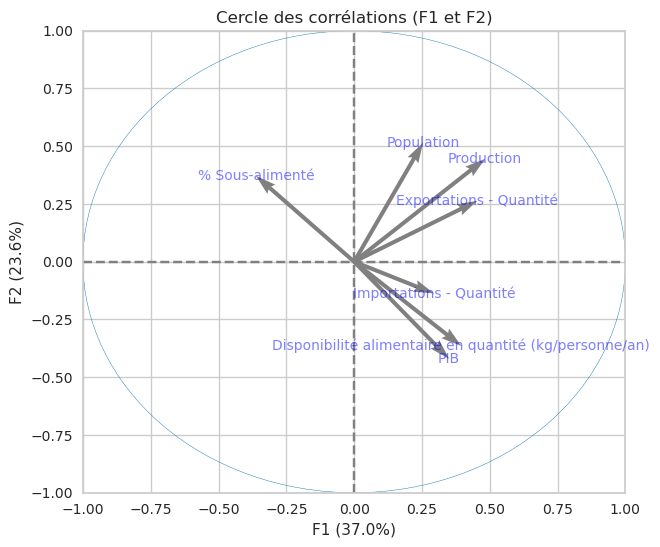

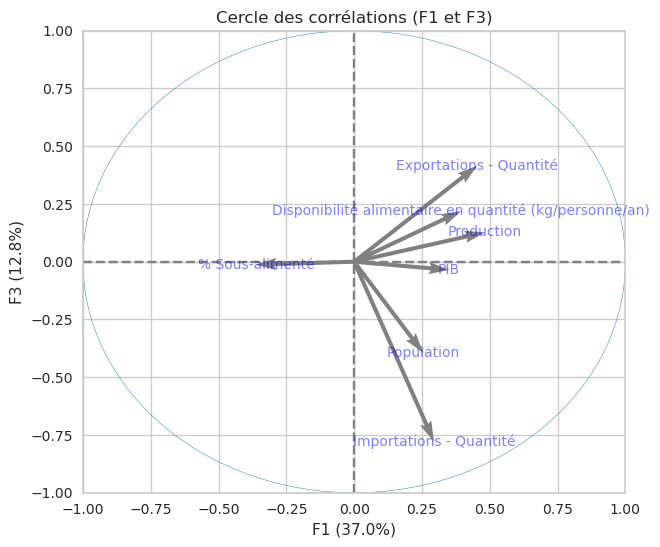

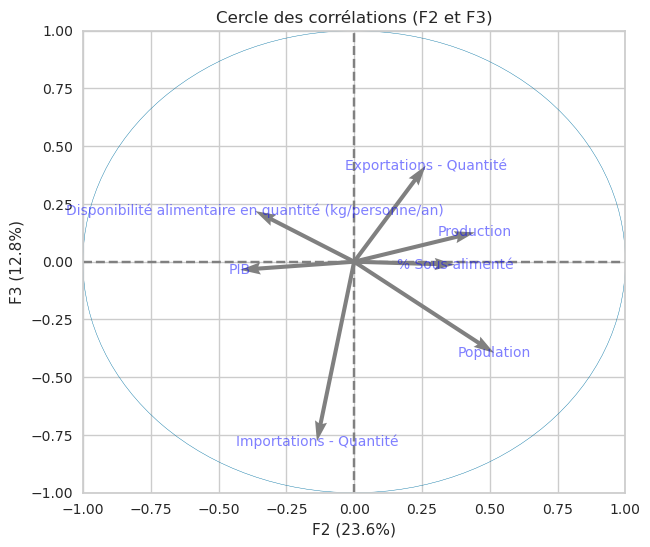

In [196]:
pca = PCA(n_components=3)
# Fit the PCA model to the data
pca.fit(DataClusteringScaled)

pcs = pca.components_
n_comp =3
features = Complet_df.columns[1:8]
display_circles(pcs, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(features))

In [197]:
# Afficher des corrélations entre les vairables et composantes
round(pd.DataFrame(pca.components_, columns = Complet_df.columns[1:8],index=["F1","F2","F3"]),2)

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Population,PIB,% Sous-alimenté
F1,0.40,0.45,0.29,0.48,0.25,0.35,-0.36
F2,-0.36,0.26,-0.14,0.45,0.52,-0.42,0.37
F3,0.22,0.42,-0.78,0.13,-0.39,-0.04,-0.01


### Projection F1 et F2

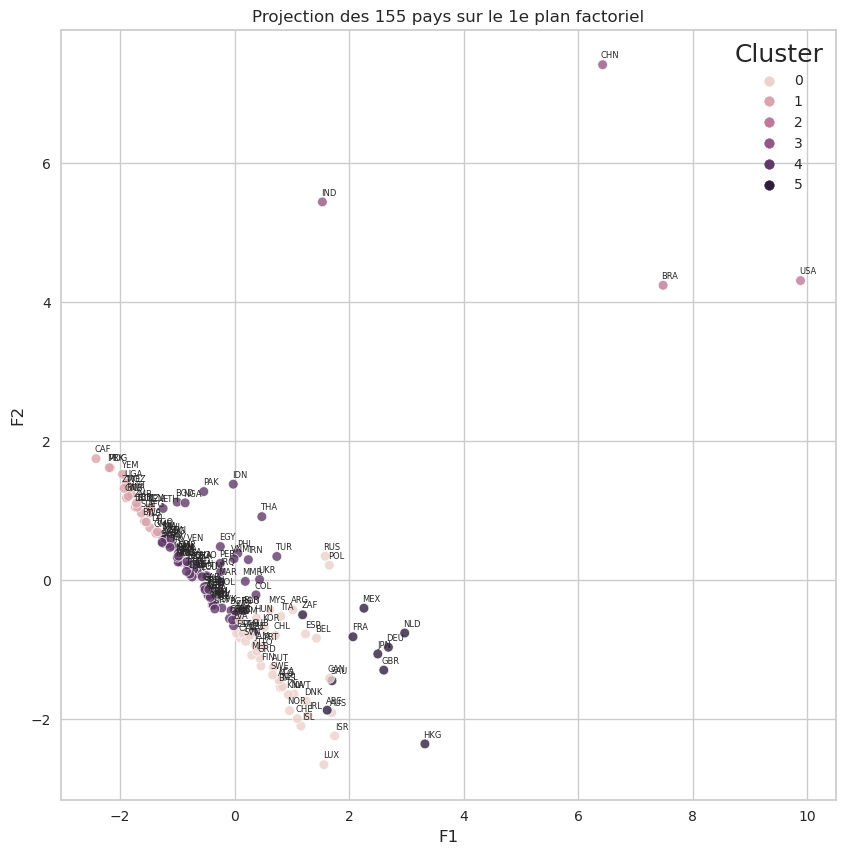

In [198]:
X_projected = pca.transform(DataClusteringScaled)

fig, axes = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 1], hue=Complet_df.Cluster, alpha=.8)

# Afficher les noms de pays à côté de chaque point
for i, row in Complet_df.iterrows():
    if i < X_projected.shape[0]:
        plt.annotate(row['ISO3'], (X_projected[i, 0], X_projected[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', size=6)

plt.title("Projection des {} pays sur le 1e plan factoriel".format(X_projected.shape[0]))

# Définir l'étiquette pour les axes x et y
plt.xlabel("F1", size=12)
plt.ylabel("F2", size=12)

plt.show()

### Projection F1 et F3

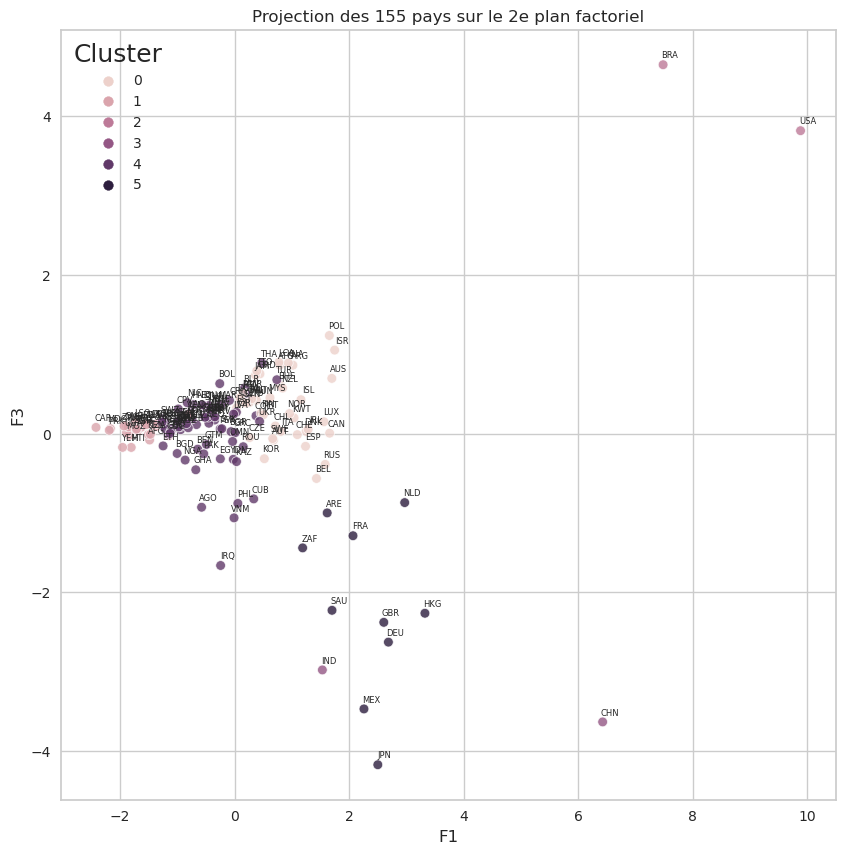

In [199]:
X_projected = pca.transform(DataClusteringScaled)

fig, axes = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 2], hue=Complet_df.Cluster, alpha=.8)

# Afficher les noms de pays à côté de chaque point
for i, row in Complet_df.iterrows():
    if i < X_projected.shape[0]:
        plt.annotate(row['ISO3'], (X_projected[i, 0], X_projected[i, 2]), textcoords="offset points", xytext=(5, 5), ha='center', size=6)

plt.title("Projection des {} pays sur le 2e plan factoriel".format(X_projected.shape[0]))

# Définir l'étiquette pour les axes x et y
plt.xlabel("F1", size=12)
plt.ylabel("F3", size=12)

plt.show()

### Projection F2 et F3

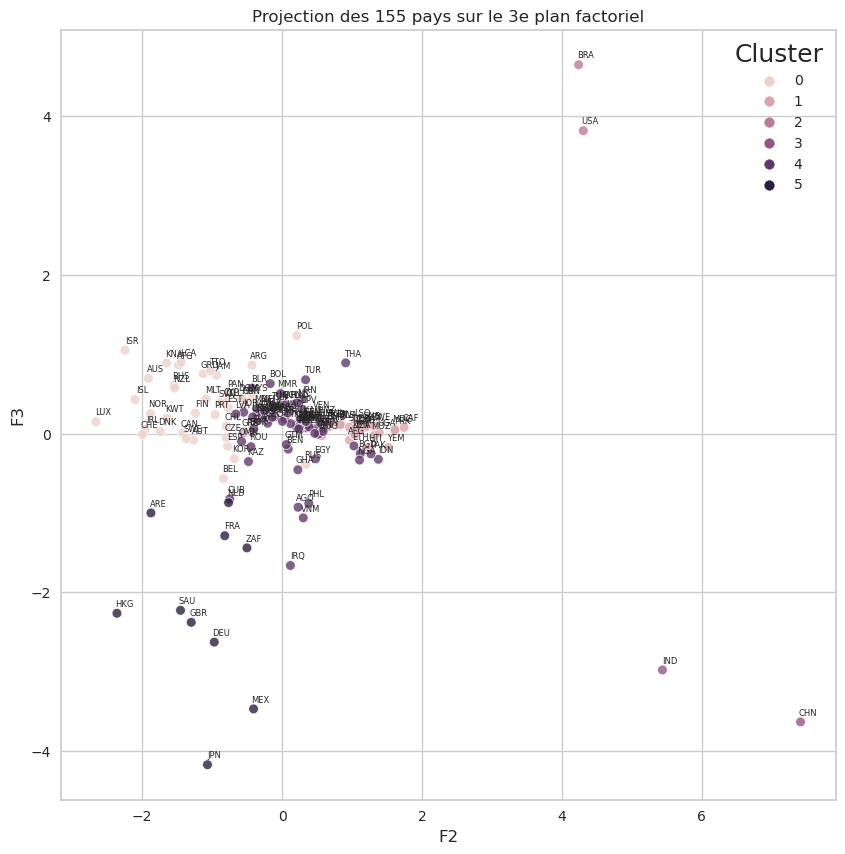

In [200]:
X_projected = pca.transform(DataClusteringScaled)

fig, axes = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_projected[:, 1], y=X_projected[:, 2], hue=Complet_df.Cluster, alpha=.8)

# Afficher les noms de pays à côté de chaque point
for i, row in Complet_df.iterrows():
    if i < X_projected.shape[0]:
        plt.annotate(row['ISO3'], (X_projected[i, 1], X_projected[i, 2]), textcoords="offset points", xytext=(5, 5), ha='center', size=6)

plt.title("Projection des {} pays sur le 3e plan factoriel".format(X_projected.shape[0]))

# Définir l'étiquette pour les axes x et y
plt.xlabel("F2", size=12)
plt.ylabel("F3", size=12)

plt.show()

In [266]:
# Les pays de cluster 5
Complet_df[Complet_df['Cluster']==5]

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Population,PIB,% Sous-alimenté,ISO3,Cluster
1,Afrique du Sud,35.69,63.0,514.0,1667.0,57009756.0,6723.928582,5.61,ZAF,5
4,Allemagne,19.47,646.0,842.0,1514.0,82658409.0,44670.222288,0.00,DEU,5
7,Arabie saoudite,43.36,10.0,722.0,616.0,33101179.0,20138.146332,4.53,SAU,5
29,Chine - RAS de Hong-Kong,53.51,663.0,907.0,24.0,7306322.0,45737.483212,0.00,HKG,5
45,France,22.90,501.0,506.0,1750.0,64842509.0,40458.149875,0.00,FRA,5
68,Japon,18.50,10.0,1069.0,2215.0,127502725.0,38928.952602,0.00,JPN,5
88,Mexique,32.52,9.0,972.0,3249.0,124777324.0,9434.378177,3.77,MEX,5
106,Pays-Bas,20.33,1418.0,608.0,1100.0,17021347.0,48460.512961,0.00,NLD,5
112,Royaume-Uni,31.94,359.0,779.0,1814.0,66727461.0,40617.679075,0.00,GBR,5
150,Émirats arabes unis,43.47,94.0,433.0,48.0,9487203.0,42522.377622,4.22,ARE,5


## Analyse des groupes

## 6 groupes, par indicateur "disponibilité alimentaire en quantité (kg/personne/an)"

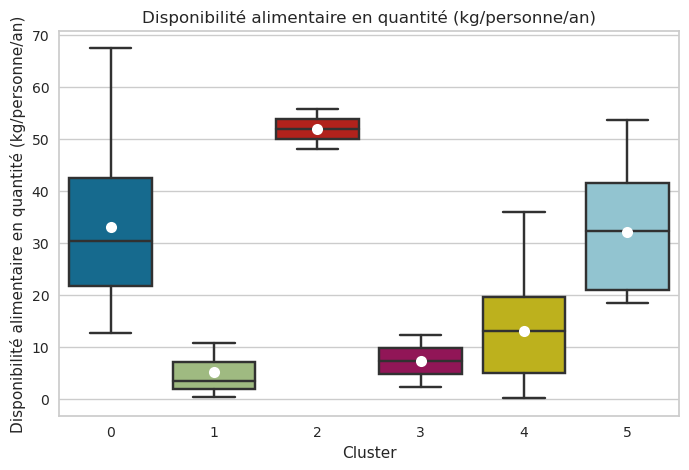

In [201]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data= Complet_df, y='Disponibilité alimentaire en quantité (kg/personne/an)', x='Cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Disponibilité alimentaire en quantité (kg/personne/an)')
plt.show()

On élimine ce cluster 1, les pays avec disponibilité alimentaire moins important

In [202]:
print('Cluster à mettre de côté :',Complet_df[Complet_df['Cluster']==1]['Zone'].unique())
cinq_groupes = Complet_df.drop(Complet_df[Complet_df['Cluster']==1].index)

Cluster à mettre de côté : ['Afghanistan' 'Botswana' 'Congo' 'Djibouti' 'Gambie' 'Guinée-Bissau'
 'Haïti' 'Kenya' 'Lesotho' 'Libéria' 'Madagascar' 'Mozambique' 'Ouganda'
 'Rwanda' 'République centrafricaine'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Sierra Leone' 'Tchad' 'Timor-Leste' 'Togo'
 'Venezuela (République bolivarienne du)' 'Yémen' 'Zambie' 'Zimbabwe']


## 5 groupes, par indicateur "PIB"

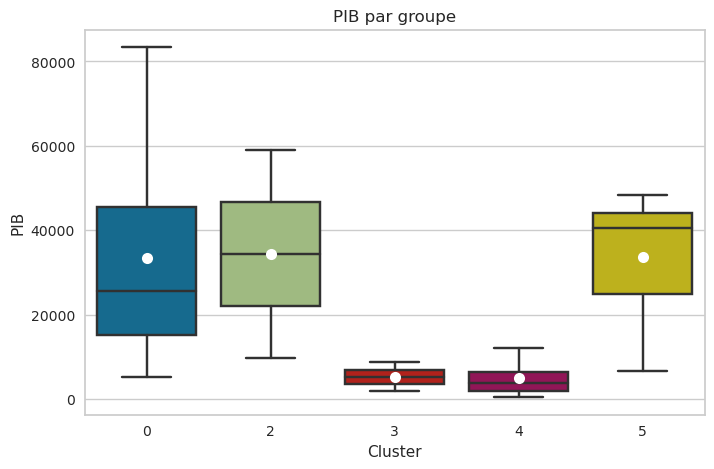

In [203]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=cinq_groupes, y='PIB', x='Cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('PIB par groupe')
plt.show()

In [204]:
print('Cluster à mettre de côté :', cinq_groupes[cinq_groupes['Cluster']==4]['Zone'].unique())
quatre_groupes = cinq_groupes.drop(cinq_groupes[cinq_groupes['Cluster']==4].index)

Cluster à mettre de côté : ['Albanie' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan' 'Bangladesh'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Bulgarie'
 'Burkina Faso' 'Bélarus' 'Bénin' 'Cabo Verde' 'Cambodge' 'Cameroun'
 'Colombie' 'Costa Rica' 'Croatie' 'Cuba' "Côte d'Ivoire" 'El Salvador'
 'Eswatini' 'Gabon' 'Ghana' 'Grèce' 'Guatemala' 'Guinée' 'Géorgie'
 'Honduras' 'Indonésie' "Iran (République islamique d')" 'Iraq' 'Jordanie'
 'Kazakhstan' 'Kirghizistan' 'Lettonie' 'Liban' 'Malawi' 'Maldives' 'Mali'
 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro' 'Myanmar' 'Namibie'
 'Nicaragua' 'Niger' 'Nigéria' 'Népal' 'Oman' 'Ouzbékistan' 'Pakistan'
 'Paraguay' 'Philippines' 'Pérou' 'Roumanie' 'République de Moldova'
 'République démocratique populaire lao' 'Serbie' 'Slovaquie' 'Soudan'
 'Sri Lanka' 'Sénégal' 'Tadjikistan' 'Thaïlande' 'Tunisie' 'Turkménistan'
 'Turquie' 'Ukraine' 'Uruguay' 'Viet Nam' 'Égypte' 'Équateur' 'Éthiopie'
 'Îles Salomon']


## 4 groupes, par indicateur "importation - quantité"

Parmi les 4 groupes encore présents, le groupe 1 importe beaucoup moins qu'il n'exporte déjà : on met ce groupe de côté.

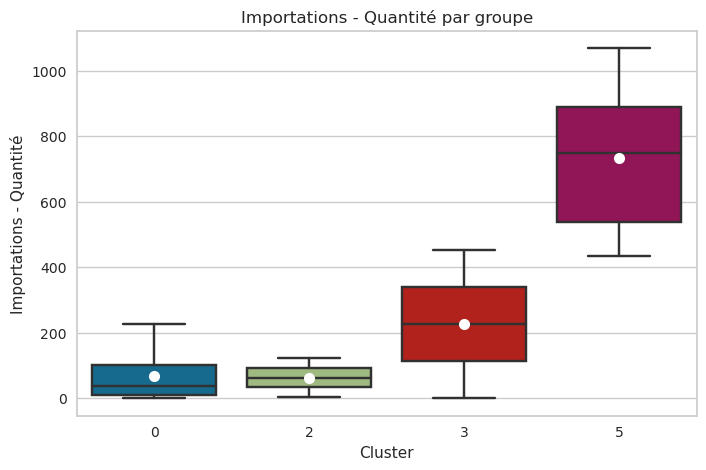

In [205]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=quatre_groupes, y='Importations - Quantité', x='Cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Importations - Quantité par groupe')
plt.show()

In [206]:
print('Cluster à mettre de côté :', quatre_groupes[quatre_groupes['Cluster']==2]['Zone'].unique())
trois_groupes = quatre_groupes.drop(quatre_groupes[quatre_groupes['Cluster']==2].index)

Cluster à mettre de côté : ['Brésil' "États-Unis d'Amérique"]


## 3 groupes, par indicateur "Population"

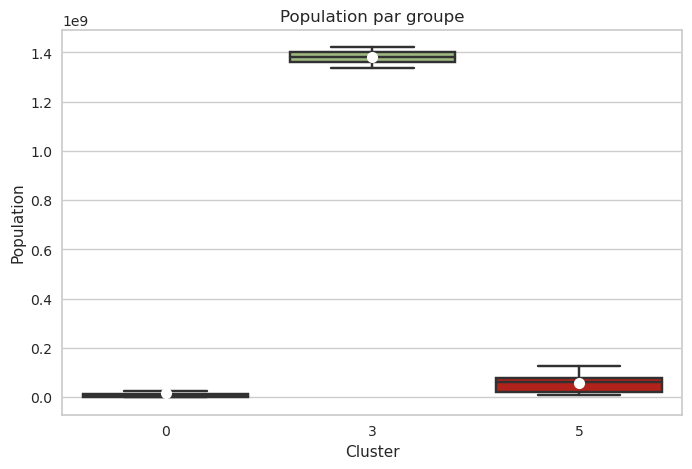

In [207]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=trois_groupes, y='Population', x='Cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Population par groupe')
plt.show()

In [209]:
print('Cluster à mettre de côté :', trois_groupes[trois_groupes['Cluster']==0]['Zone'].unique())
deux_groupes = trois_groupes.drop(trois_groupes[trois_groupes['Cluster']==0].index)

Cluster à mettre de côté : ['Antigua-et-Barbuda' 'Argentine' 'Australie' 'Autriche' 'Bahamas'
 'Belgique' 'Canada' 'Chili' 'Chypre' 'Danemark' 'Espagne' 'Estonie'
 'Finlande' 'Fédération de Russie' 'Grenade' 'Hongrie' 'Irlande' 'Islande'
 'Israël' 'Italie' 'Jamaïque' 'Koweït' 'Lituanie' 'Luxembourg' 'Malaisie'
 'Malte' 'Norvège' 'Nouvelle-Zélande' 'Panama' 'Pologne' 'Portugal'
 'République de Corée' 'République dominicaine' 'Saint-Kitts-et-Nevis'
 'Sainte-Lucie' 'Slovénie' 'Suisse' 'Suède' 'Tchéquie' 'Trinité-et-Tobago']


## 2 groupes, par indicateur "% sous-alimenté"

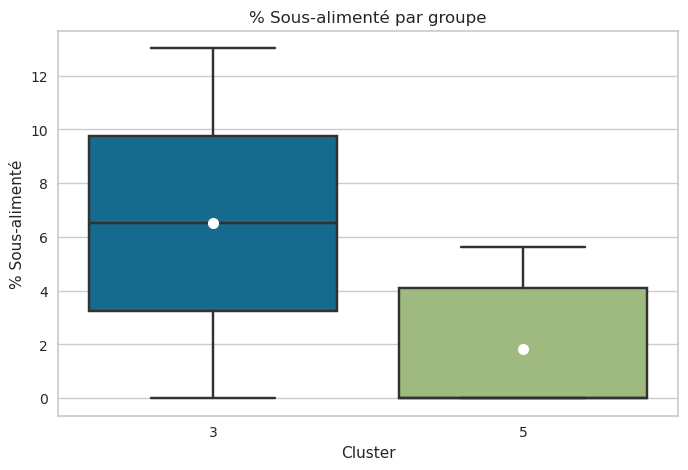

In [210]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=deux_groupes, y='% Sous-alimenté', x='Cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('% Sous-alimenté par groupe')
plt.show()

In [211]:
print('Cluster à mettre de côté :', deux_groupes[deux_groupes['Cluster']==3]['Zone'].unique())
groupe = deux_groupes.drop(deux_groupes[deux_groupes['Cluster']==3].index)

Cluster à mettre de côté : ['Chine, continentale' 'Inde']


### Liste de pays groupe final 

In [212]:
groupe

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Population,PIB,% Sous-alimenté,ISO3,Cluster
1,Afrique du Sud,35.69,63.0,514.0,1667.0,57009756.0,6723.928582,5.61,ZAF,5
4,Allemagne,19.47,646.0,842.0,1514.0,82658409.0,44670.222288,0.00,DEU,5
7,Arabie saoudite,43.36,10.0,722.0,616.0,33101179.0,20138.146332,4.53,SAU,5
29,Chine - RAS de Hong-Kong,53.51,663.0,907.0,24.0,7306322.0,45737.483212,0.00,HKG,5
45,France,22.90,501.0,506.0,1750.0,64842509.0,40458.149875,0.00,FRA,5
68,Japon,18.50,10.0,1069.0,2215.0,127502725.0,38928.952602,0.00,JPN,5
88,Mexique,32.52,9.0,972.0,3249.0,124777324.0,9434.378177,3.77,MEX,5
106,Pays-Bas,20.33,1418.0,608.0,1100.0,17021347.0,48460.512961,0.00,NLD,5
112,Royaume-Uni,31.94,359.0,779.0,1814.0,66727461.0,40617.679075,0.00,GBR,5
150,Émirats arabes unis,43.47,94.0,433.0,48.0,9487203.0,42522.377622,4.22,ARE,5
